# Credit card applications Dataset
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/Automobile_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/Credit_Card_Applications.csv)

In [9]:
#Importing some necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from minisom import MiniSom

In [5]:
data = pd.read_csv("../../Lab1/Romil/Data/Credit_Card_Applications.csv")

In [6]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [7]:
#Making x and y from data
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x.shape

(690, 15)

In [8]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(x)

In [10]:
#Creating the som object
som = MiniSom(10,10,15)

In [11]:
#Traingin the SOM
som.random_weights_init(X)
som.train_random(data = X, num_iteration=100)

In [12]:
#visualizing the results
from pylab import bone, pcolor, colorbar, plot , show

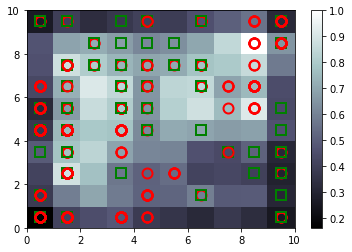

In [13]:
#Initialize a window
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()
    
    

**
In above graph, cells which have red circle have the list of customers didn't get approval and which have green circle got approval.  
**  
**
But the cell which has high interneuron distance close to 1 and have green circle are having the list of those customers who cheated and got approval.
**
**
So these customers are more related for bank to considered as fraud.
**

In [14]:
#Finding the frauds
mappings = som.win_map(X)

In [16]:
frauds = np.concatenate((mappings[(1,2)], mappings[(4,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [17]:
frauds = pd.DataFrame(frauds)
frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15686461.0,1.0,25.00,12.500,2.0,6.0,4.0,3.000,1.0,0.0,0.0,1.0,1.0,20.0,1.0
1,15680643.0,1.0,21.50,11.500,2.0,3.0,4.0,0.500,1.0,0.0,0.0,1.0,2.0,100.0,69.0
2,15692137.0,1.0,48.75,26.335,1.0,1.0,1.0,0.000,1.0,0.0,0.0,1.0,2.0,0.0,1.0
3,15668830.0,1.0,38.67,0.210,2.0,4.0,4.0,0.085,1.0,0.0,0.0,1.0,2.0,280.0,1.0
4,15796569.0,1.0,27.67,13.750,2.0,9.0,4.0,5.750,1.0,0.0,0.0,1.0,2.0,487.0,501.0
5,15805212.0,1.0,19.67,10.000,1.0,4.0,8.0,0.835,1.0,0.0,0.0,1.0,2.0,140.0,1.0
6,15712877.0,1.0,34.83,4.000,2.0,2.0,5.0,12.500,1.0,0.0,0.0,1.0,2.0,184.0,1.0
7,15691150.0,1.0,45.17,1.500,2.0,8.0,4.0,2.500,1.0,0.0,0.0,1.0,2.0,140.0,1.0
8,15785339.0,1.0,35.25,3.165,2.0,14.0,8.0,3.750,1.0,0.0,0.0,1.0,2.0,680.0,1.0
9,15573520.0,1.0,24.33,6.625,1.0,2.0,4.0,5.500,1.0,0.0,0.0,1.0,1.0,100.0,1.0


** Above are the list of customers who cheated and got approval for credit card application. **